# US Traffic Accidents Exploratory Data Analysis

## Introduction

### What is Exploratory Data Analysis (EDA)? 
Exploratory data analysis is used to investigate datasets to summarize their main characteristics and draw conclusions *before* any formal statistical modeling or inference is made. It is a crucial first step in the data analysis procedure as it help save time and resources in the future. EDA is especially useful in discovering patterns, locating any abnormalities and finding any interesting relations in the data.

In this notebook we'll analyze a car accident dataset from the USA. This current version of the dataset contains information from 4.2 million traffic accidents during *February 2016* - *December 2020* that took place all over the Contiguous United States. The data was collected using multiple Traffic APIs, such as MapQuest and Bing, and several other data providers. 

Although this dataset can be used for a variety of applications, we will be focusing on how **precipitation** and other **environmental factors** impacted the accidents. 

If you would like to learn more about the raw data itself please visit: https://smoosavi.org/datasets/us_accidents 


#### Downloading the data


In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
dataset_url = "https://www.kaggle.com/sobhanmoosavi/us-accidents" 
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: malihalodi
Your Kaggle Key: ··········


  2%|▏         | 5.00M/299M [00:00<00:09, 31.9MB/s]

100%|██████████| 299M/299M [00:03<00:00, 86.8MB/s]


### Data Preperation and Cleaning 



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import folium
from folium.plugins import HeatMap
sns.set_style("darkgrid")

In [ ]:
raw_df = pd.read_csv("/content/us-accidents/US_Accidents_Dec20.csv")

In [ ]:
raw_df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

As you can see, there is a lot more information than we want currently in the dataset. For example, we won't really need to worry about what amenities there were or if there was a roundabout near the accident. We are only focused on the *environmental factors* in this notebook. 

Please also note that we will only be looking at the time of day in relation to Nautical Twilight. This is because Nautical Twilight takes place right in between Civil and Astronomical Twilight. I felt that if we used the other twilights, there would be a bit of bias in regards to what is considered "Day" or "Night". As such, I chose to just use the middle value. 

<img src="https://c.tadst.com/gfx/1200x630/twiligh-phases.png?1" alt="Different Types of Twilights and their degrees" width="500"/>

If you would like to read more about the differences between Civil, Nautical, and Astronomical Twilight please visit: https://www.weather.gov/lmk/twilight-types



Now let's go ahead and only select the columns we are interested in. 

In [ ]:
selected_columns = ['ID', 'Source', 'Severity', 'Start_Time', 'End_Time',
                     'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
                    'Description', 'City', 'State', 'Timezone', 'Weather_Timestamp',
                    'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
                    'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
                    'Precipitation(in)', 'Weather_Condition', 
                    'Sunrise_Sunset', 'Nautical_Twilight']

len(selected_columns)

26

In [ ]:
len(raw_df.columns)

NameError: ignored

Note that we've about halved the amount of columns! That's about half of the dataset that we're not interested in. 

Let's now go ahead and make a new copy of the data, containing only the information we want called <code> weather_df </code>. Using <code> weather_df </code>, we can continue to modify and analyze further without actually affecting the original data and dataframe.

In [ ]:
weather_df = raw_df[selected_columns].copy()

Let's just get a better idea of whats inside <code>weather_df</code>

In [ ]:
weather_df.shape

(4232541, 22)

In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 22 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Source             object 
 2   Severity           int64  
 3   Start_Time         object 
 4   End_Time           object 
 5   Start_Lat          float64
 6   Start_Lng          float64
 7   End_Lat            float64
 8   End_Lng            float64
 9   Distance(mi)       float64
 10  Timezone           object 
 11  Weather_Timestamp  object 
 12  Temperature(F)     float64
 13  Wind_Chill(F)      float64
 14  Humidity(%)        float64
 15  Visibility(mi)     float64
 16  Wind_Direction     object 
 17  Wind_Speed(mph)    float64
 18  Precipitation(in)  float64
 19  Weather_Condition  object 
 20  Sunrise_Sunset     object 
 21  Nautical_Twilight  object 
dtypes: float64(11), int64(1), object(10)
memory usage: 710.4+ MB


Before moving forwards, let's also take care of any missing or Null values. We'll first see exactly how many missing values we have. 

In [ ]:
missing_percentage = weather_df.isna().sum().sort_values(ascending = False) / len(weather_df)
missing_percentage

End_Lng              0.641808
End_Lat              0.641808
Precipitation(in)    0.488026
Wind_Chill(F)        0.447958
Wind_Speed(mph)      0.113248
Visibility(mi)       0.023312
Weather_Condition    0.023244
Humidity(%)          0.022555
Temperature(F)       0.021240
Wind_Direction       0.019754
Weather_Timestamp    0.014801
Timezone             0.001090
Nautical_Twilight    0.000033
Sunrise_Sunset       0.000033
Distance(mi)         0.000000
Start_Lng            0.000000
Start_Lat            0.000000
End_Time             0.000000
Start_Time           0.000000
Severity             0.000000
Source               0.000000
ID                   0.000000
dtype: float64

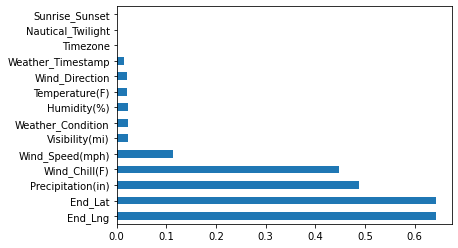

In [ ]:
missing_percentage[missing_percentage != 0].plot(kind = "barh")

From the graph we can see that *End_Lat* and *End_Lng* have the greatest amount of missing values, followed by *Precipitation* and *Wind_Chill*. 

We won't worry about the missing *End_Lat* and *End_Lng* values ***just*** yet as these missing values may indicate that that the vehicle simply did not move after the accident. In some states, moving the car after a crash is actually illegal so this may also be a factor in the missing values. 



In [ ]:
weather_df.dropna(subset = ["Humidity(%)", "Weather_Condition", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)", "Wind_Chill(F)"], inplace=True)

Let's just making sure that the missing values were actually dropped. 
Note that we are not dropping *all* of the columns. The remaining ones just have such a small amount of missing values that it won't really have an affect on the analysis down the road. 

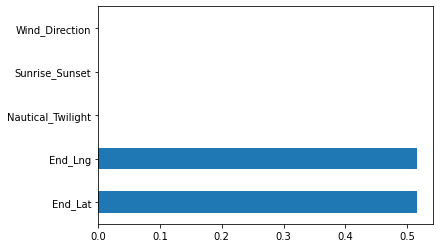

In [ ]:
missing_percentage = weather_df.isna().sum().sort_values(ascending = False) / len(weather_df)
missing_percentage[missing_percentage != 0].plot(kind = "barh")

Now that all of the missing values have been dealt with, lets actually get into the data and see if there are any incorrect values.

Let's start off with some basic statistics. 

In [ ]:
weather_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.947524e+06,1.947524e+06,1.947524e+06,942393.000000,942393.000000,1.947524e+06,1.947524e+06,1.947524e+06,1.947524e+06,1.947524e+06,1.947524e+06,1.947524e+06
mean,2.231194e+00,3.652034e+01,-9.532613e+01,36.758525,-98.954390,3.942732e-01,6.045401e+01,5.910090e+01,6.658659e+01,8.928092e+00,7.227516e+00,6.857595e-03
std,5.085737e-01,5.066334e+00,1.741001e+01,5.274356,18.616817,1.705830e+00,1.851140e+01,2.069910e+01,2.277868e+01,2.790075e+00,5.523915e+00,8.475373e-02
min,1.000000e+00,2.455527e+01,-1.245344e+02,24.574326,-124.497478,0.000000e+00,-2.700000e+01,-5.270000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.363607e+01,-1.173305e+02,33.823529,-118.249695,0.000000e+00,4.700000e+01,4.500000e+01,5.000000e+01,1.000000e+01,3.000000e+00,0.000000e+00
50%,2.000000e+00,3.597674e+01,-8.837130e+01,36.845010,-94.503528,0.000000e+00,6.200000e+01,6.200000e+01,7.000000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.049569e+01,-8.076840e+01,40.697090,-80.777210,1.500000e-01,7.500000e+01,7.500000e+01,8.600000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.748413e+01,49.075000,-67.484130,4.417500e+02,1.890000e+02,1.890000e+02,1.000000e+02,1.000000e+02,9.840000e+02,2.500000e+01


There seems to be a problem with the Distance(mi) column. The maximum distance is a car moved during the accident is 441.75 miles. This value seems a bit too high, and as such, seems unreliable and unrealistic.  

There are similiar problems with Temperature(F), Wind_Chill(F) and Wind_Speed(mph) columns. The maximum value in each of these columns seems too high to be realistic. For example, it does not make sense that the temperature during the accident was 189 degrees Farenheit when the highest recorded temperature ever on Earth is 134 degrees Farenheit (set on July 10, 1913). 

A simple fix for these unrealistic and unreliable values are to simply exclude them from our analysis. 

In [ ]:
weather_df.drop(weather_df[weather_df["Distance(mi)"] > 100].index, inplace=True)
weather_df.drop(weather_df[weather_df["Temperature(F)"] > 134].index, inplace=True)
weather_df.drop(weather_df[weather_df["Wind_Chill(F)"] > 60].index, inplace=True)
weather_df.drop(weather_df[weather_df["Wind_Speed(mph)"] > 231].index, inplace=True)

In [ ]:
weather_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,916593.000000,916593.000000,916593.000000,491332.000000,491332.000000,916593.000000,916593.000000,916593.000000,916593.000000,916593.00000,916593.000000,916593.000000
mean,2.220156,38.561768,-95.908320,38.723360,-99.568291,0.438919,44.325631,41.450684,73.651237,8.34439,6.934437,0.008162
std,0.495037,4.478687,18.141126,4.545407,18.956603,1.649346,11.857229,15.024626,19.346671,3.20367,5.775660,0.109222
min,1.000000,24.574326,-124.534439,24.574546,-124.497478,0.000000,-27.000000,-52.700000,4.000000,0.00000,0.000000,0.000000
25%,2.000000,34.838684,-117.843520,34.731385,-118.910753,0.000000,37.000000,32.000000,61.000000,8.00000,3.000000,0.000000
50%,2.000000,38.930970,-90.532898,38.907766,-94.739013,0.000000,46.000000,44.000000,78.000000,10.00000,6.000000,0.000000
75%,2.000000,41.875480,-80.101700,42.178148,-80.797960,0.240000,54.000000,54.000000,89.000000,10.00000,10.000000,0.000000
max,4.000000,49.002201,-67.484130,49.075000,-67.484130,99.791000,60.000000,60.000000,100.000000,100.00000,230.000000,24.000000


#### Note that we only have about 916 000 entries left in our dataset after cleaning and preparing it! We originally had over 4.2 million entries. That's about 3 million entries which were unusable for either containing null/missing values or have unrealistic information inside. 

#### We've now cleaned up and prepared the dataset for analysis. Let's take a look at a sample of rows from the data frame. 

In [ ]:
weather_df.sample(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Timezone,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Nautical_Twilight
933857,A-933950,MapQuest,2,2020-02-05 06:27:51,2020-02-05 07:12:32,28.536598,-81.527679,NaN,NaN,0.000,US/Eastern,2020-02-05 06:53:00,59.0,59.0,93.0,9.0,S,3.0,0.00,Fair,Night,Day
3645215,A-3652051,Bing,2,2020-04-21 15:54:45,2020-04-21 16:09:45,39.989350,-75.206380,39.977240,-75.199910,0.904,US/Eastern,2020-04-21 15:54:00,57.0,57.0,57.0,10.0,WNW,20.0,0.00,Mostly Cloudy,Day,Day
1756143,A-1756255,MapQuest,2,2018-11-13 07:46:18,2018-11-13 08:15:30,40.169731,-74.917213,NaN,NaN,0.000,US/Eastern,2018-11-13 07:53:00,46.0,41.4,96.0,3.0,North,9.2,0.07,Light Rain,Day,Day
3123177,A-3125714,Bing,2,2020-11-14 00:24:34,2020-11-14 02:39:25,36.842705,-76.022862,36.842817,-76.023660,0.045,US/Eastern,2020-11-14 00:56:00,52.0,52.0,89.0,7.0,CALM,0.0,0.00,Fair,Night,Night
3778700,A-3785561,Bing,2,2019-12-20 18:50:50,2019-12-20 19:19:47,42.415060,-82.940330,42.418570,-82.934590,0.380,US/Eastern,2019-12-20 18:53:00,30.0,23.0,72.0,10.0,ESE,7.0,0.00,Fair,Night,Night
3006438,A-3007340,Bing,2,2020-12-30 03:19:00.000000000,2020-12-30 04:35:46.000000000,40.185047,-75.564099,40.185086,-75.563212,0.047,US/Eastern,2020-12-30 02:54:00,23.0,23.0,78.0,10.0,CALM,0.0,0.00,Fair,Night,Night
543065,A-543086,MapQuest,3,2020-12-07 15:22:13,2020-12-07 16:06:48,41.038528,-81.504646,NaN,NaN,0.340,US/Eastern,2020-12-07 14:54:00,35.0,26.0,59.0,10.0,NNW,14.0,0.00,Cloudy,Day,Day
3324244,A-3329638,Bing,2,2020-11-15 01:39:00,2020-11-15 03:40:15,39.797976,-84.252733,39.797974,-84.252980,0.013,US/Eastern,2020-11-15 01:56:00,57.0,57.0,49.0,10.0,SSE,16.0,0.00,Cloudy,Night,Night
3643257,A-3650093,Bing,2,2020-04-20 08:38:24,2020-04-20 08:53:24,37.525010,-77.437740,37.525010,-77.437740,0.000,US/Eastern,2020-04-20 08:56:00,52.0,52.0,89.0,10.0,NNE,9.0,0.03,Light Rain,Day,Day
2998747,A-2999544,Bing,2,2020-12-29 03:07:00,2020-12-29 04:26:00,33.996961,-117.930567,33.997059,-117.931193,0.036,US/Pacific,2020-12-29 02:53:00,45.0,42.0,76.0,10.0,ENE,6.0,0.00,Fair,Night,Night


## Exploratory Analysis and Visualization
#### Let's begin by seeing where exactly the accidents are occuring. We'll do this by taking a 10% sample of the data and using the "Start Longitude" and "Start Latitude" columns.

In [ ]:
location_df = weather_df.sample(int(0.1 * len(weather_df)))

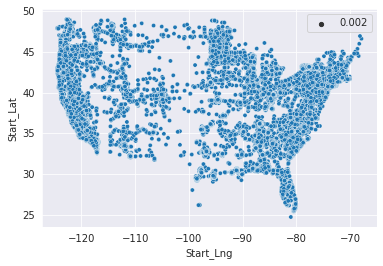

In [ ]:
sns.scatterplot(x = location_df.Start_Lng, y = location_df.Start_Lat, size = 0.002)

In [ ]:
latitude_longitude_pairs = list(zip(list(location_df.Start_Lat), list(location_df.Start_Lng)))

In [ ]:
map = folium.Map()
HeatMap(latitude_longitude_pairs, radius=20).add_to(map)
map

#### As you can see from the heatmap, the greatest amount of accidents occured in or near the coastal cities. 

Let's start looking at the states with the most and least amount of accidents now and see if our claim about coastel cities having the most amount of accidents is true or not.

- [ ] initial analysis 
  - how many accidents
  - where in the states (heatmap?)
  - when do the most accidents happen? (around holidays? in summer/winter?)
- more in depth 
  - [ ] select a subset of columns to look at 
  - [ ] make question list of what going to be answering and specifically looking at in the notebook

# Questions to think about 
- Does weather condition make an impact in the severity of the accident? 
  - i.e if there was rain/hail/snow is the accident more severe? 
  - What type of weather correlates to the most severity? (does driving in snow/hail/rain have a greater effect on severity)

- Digging deeper into weather:
    - what about weather at night vs in the day? 
       - does raining during the night make it worse to drive in, causing more accidents than raining during the day? 
    - Does faster rain/snow/rain relate to more accidents? 

- Connection between tire pressure, severity and weather condition? 
  - i.e less tire pressure, more snow makes it harder to drive and leads to more accidents? 
  this is a test

#References

*   Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

* Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

*   https://www.ibm.com/cloud/learn/exploratory-data-analysis 
*   https://www.stat.cmu.edu/~hseltman/309/Book/chapter4.pdf 
* https://pandas.pydata.org/pandas-docs/stable/reference/general_functions.html
* https://www.timeanddate.com/astronomy/different-types-twilight.html 
* https://www.washingtonpost.com/weather/2020/08/16/death-valley-heat-record/
* https://www.mountwashington.org/about-us/history/world-record-wind.aspx#:~:text=For%20nearly%20sixty%2Dtwo%20years,by%20Mount%20Washington%20Observatory%20staff. 